# About the notebook

In [2]:
library(tidyverse)
library(healthyFlowData)
library(flowMatch)
library(flowMeans)
library(cluster)

# Create data

get data

In [27]:
data(hd)
hd.flowSet

A flowSet with 20 experiments.

An object of class 'AnnotatedDataFrame'
  rowNames: A_1 A_2 ... D_5 (20 total)
  varLabels: subject replicate Name
  varMetadata: labelDescription

  column names:
  CD4 CD8 CD3 CD19

scaled data matrix

In [56]:
sample = exprs(hd.flowSet[[1]])
sample = scale(sample)
dim(sample)

[1] 19321     4

# Perform Kmeans

In [57]:
km  = kmeans(sample, centers=4, nstart=20)
sil = silhouette(km$cluster, dist(sample))
sil_sum = summary(sil)

In [58]:
sil_sum$avg.width
mean(sil[,3])

[1] 0.7040505

[1] 0.7040505

# Try different k in kmeans

In [61]:
### initialization
x_avg_width = c()
num_clust   = 2:10

### try different k in kmeans
for (k in num_clust){
    km = kmeans(sample, centers=k, nstart=20)
    sil = silhouette(km$cluster, dist(sample))
    x_avg_width = c(x_avg_width, mean(sil[,3]))
} # end for loop

Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 966050)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 966050)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 966050)”Warning message:
“did not converge in 10 iterations”Warning message:
“did not converge in 10 iterations”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 966050)”Warning message:
“did not converge in 10 iterations”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 966050)”Warning message:
“did not converge in 10 iterations”Warning message:
“did not converge in 10 iterations”

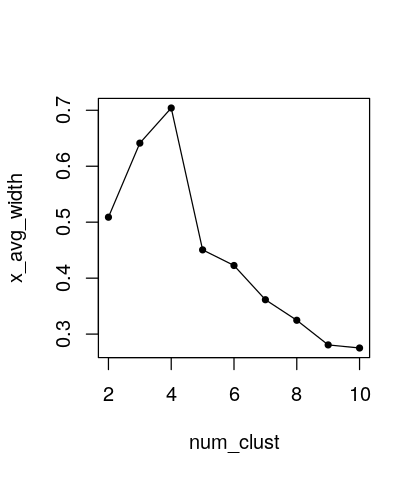

In [62]:
options(repr.plot.width = 3.5, repr.plot.height = 4)
plot(num_clust, x_avg_width, pch = 20)
lines(num_clust, x_avg_width)